In [1]:
import pandas as pd
import numpy as np
import random

### Decompose of data

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

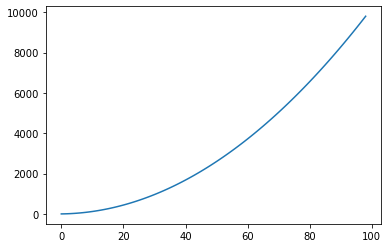

In [3]:
series=[i**2 for i in range(1,100)]
series=pd.Series(series)
series.plot()
plt.show()


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
res=seasonal_decompose(series, model='additive',period=10)
res

In [5]:
dir(res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [6]:
res.seasonal

0    -1.030287e-13
1    -2.007283e-13
2    -1.314504e-13
3     5.506706e-14
4     2.344791e-13
          ...     
94    2.344791e-13
95   -6.927792e-14
96    9.592327e-14
97   -1.421085e-14
98   -8.704149e-14
Name: seasonal, Length: 99, dtype: float64

In [7]:
res._seasonal

0    -1.030287e-13
1    -2.007283e-13
2    -1.314504e-13
3     5.506706e-14
4     2.344791e-13
          ...     
94    2.344791e-13
95   -6.927792e-14
96    9.592327e-14
97   -1.421085e-14
98   -8.704149e-14
Name: seasonal, Length: 99, dtype: float64

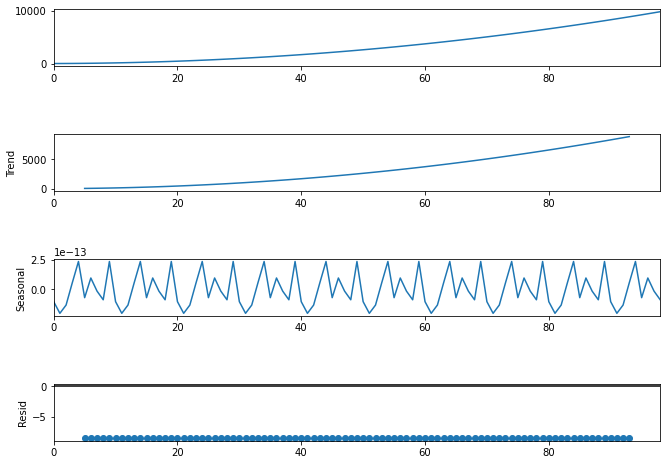

In [20]:
resp=res.plot()
resp.set_size_inches((10,7))
plt.show()

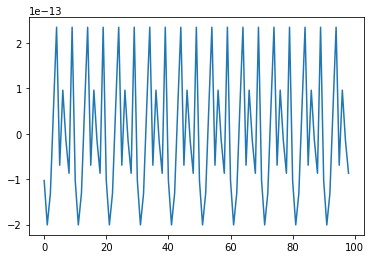

In [9]:
res.seasonal.plot()
plt.show()

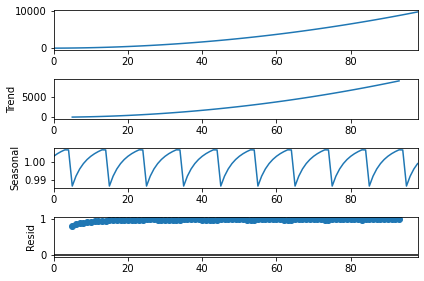

In [10]:
res1=seasonal_decompose(series, model='multiplicative',period=10)
res1.plot()
plt.show()

### Transforming of Data

In [11]:
data=pd.read_csv('airline-passengers.csv', header=0, index_col=0)
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


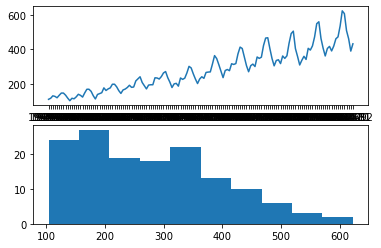

In [13]:
series=data['Passengers']
plt.figure(1)

plt.subplot(211)
plt.plot(series)

plt.subplot(212)
plt.hist(series);

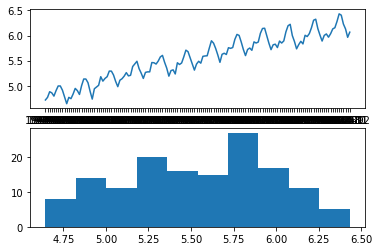

In [14]:
tra_data=np.log(series)
plt.figure(1)

plt.subplot(211)
plt.plot(tra_data)

plt.subplot(212)
plt.hist(tra_data);

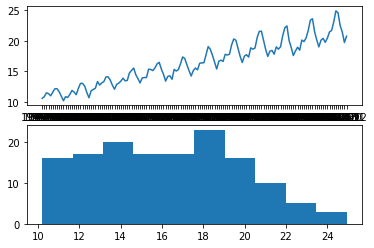

In [15]:
tra_data=np.sqrt(series)
plt.figure(1)

plt.subplot(211)
plt.plot(tra_data)

plt.subplot(212)
plt.hist(tra_data);

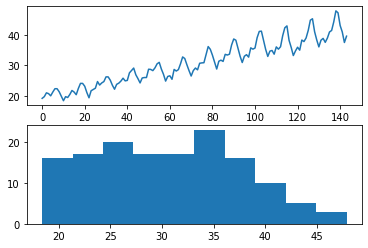

In [16]:
from scipy.stats import boxcox
tra_data= boxcox(series, lmbda=0.5)
plt.figure(1)

plt.subplot(211)
plt.plot(tra_data)

plt.subplot(212)
plt.hist(tra_data);

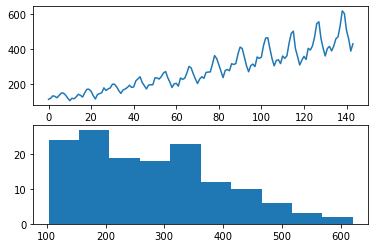

In [17]:
tra_data= boxcox(series, lmbda=1)
plt.figure(1)

plt.subplot(211)
plt.plot(tra_data)

plt.subplot(212)
plt.hist(tra_data);

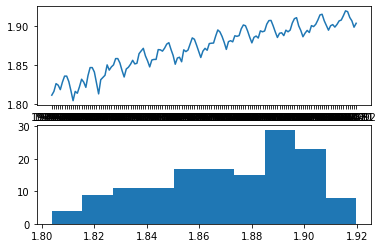

In [21]:
tra_data= pd.Series(boxcox(series, lmbda=-0.5), index=series.index)
plt.figure(1)

plt.subplot(211)
plt.plot(tra_data)

plt.subplot(212)
plt.hist(tra_data);

In [19]:
tra_data

array([1.81101776, 1.81588508, 1.82592234, 1.82390982, 1.81818182,
       1.82786741, 1.83560101, 1.83560101, 1.82850141, 1.8166603 ,
       1.80388386, 1.81588508, 1.81349904, 1.82182584, 1.83156962,
       1.82786741, 1.82111456, 1.83615362, 1.846607  , 1.846607  ,
       1.84088854, 1.82657801, 1.81268284, 1.83096915, 1.83390904,
       1.83670068, 1.85009366, 1.84334791, 1.84750143, 1.85009366,
       1.85822376, 1.85822376, 1.85255804, 1.84286516, 1.83447882,
       1.84476989, 1.84705618, 1.8509288 , 1.85603685, 1.85134117,
       1.85215575, 1.86454291, 1.86812391, 1.87143513, 1.86165711,
       1.85528508, 1.84750143, 1.85640837, 1.85714286, 1.85714286,
       1.86981109, 1.86953439, 1.86783628, 1.87169994, 1.87690851,
       1.87873219, 1.87008604, 1.86231432, 1.8509288 , 1.85893088,
       1.85997199, 1.85413501, 1.86953439, 1.86725534, 1.86925591,
       1.87690851, 1.88491293, 1.88315875, 1.87572605, 1.86783628,
       1.85962752, 1.86783628, 1.87143513, 1.86897564, 1.87760

### Forcasting